# Data Merge

This is a template notebook to import and merge datasets. The result will be one flat csv-file.

Author: {{ cookiecutter.author_name }}
Created: {{ cookiecutter.timestamp }}


In [1]:
# Link to project experiments folder hypothesis_experiment_learnings.board (refresh and hit enter on this line to see the link)

## How to use the notebook

The following cells:
- import the data,
- perform Data Structuring,
    - merge dataframes
    - pivot dataframes

By default, the notebook is set up to run with an example (Daily Delhi Climate). To see how it works, run the notebook without changing the code.

For your project, adjust the code in the linked cells with your methods and then execute cells in the order you wish to process your data.

Please refer to data_merge.board for detailed instructions. The headers in this notebook follow the cards on the board.

### Imports and general setup

In [4]:
import numpy as np
import pandas as pd

from modules.modules import *

## 2. Import the Data

#### 2.1 Read the Data

In [5]:
# Default example file
# <halerium id="d9a0fe42-e917-472c-bac8-00390a3874ea">
path = 'https://raw.githubusercontent.com/erium/halerium-example-data/main/data_preparation/DailyDelhiClimateTrainMissing.csv'

filepaths = [path] # Multiple filepaths
sheet = [0] # Sheet number for Excel (multiple for multiple files. If only one is specified it will be the same for all files)
sep = [" "] # Separator for text files (multiple for multiple files. If only one is specified it will be the same for all files)
datetime_col = ['date'] # Column name for datetime column (multiple for multiple files. If only one is specified it will be the same for all files)
# </halerium id="d9a0fe42-e917-472c-bac8-00390a3874ea">


#### 2.2 Merge the Data

In [6]:
# <halerium id="797fba5f-2179-4412-aa77-bb7f4026f0a0">
join = 'vertical' # 'vertical', 'inner' or 'outer' (if >1 file)
# </halerium id="797fba5f-2179-4412-aa77-bb7f4026f0a0">

Import and merge the raw data

In [7]:
df = Importer.import_data(filepaths, sheet, sep, datetime_col, join)

Visualise the raw imported data

In [8]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


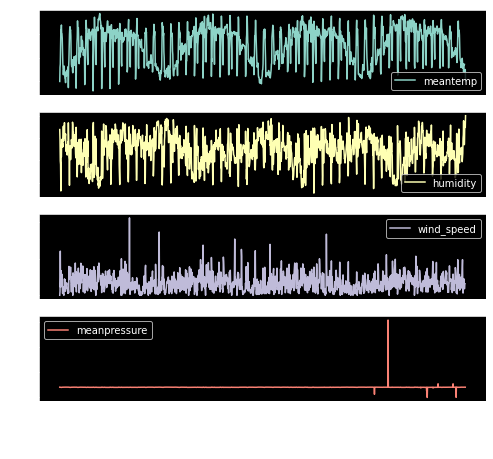

In [9]:
Plotter.plot_line(df)

## 3. Pivot the Dataframe

In [10]:
# <halerium id="82d8e406-e0d5-4bdb-add0-55ff351b4fea">
pivot = False
# </halerium id="82d8e406-e0d5-4bdb-add0-55ff351b4fea">

if pivot:
    df = df.T
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


## 4. Export

View final data frame before export

In [11]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-02-01,7.400000,92.000000,2.980000,1017.800000
2013-03-01,7.166667,87.000000,4.633333,1018.666667
2013-04-01,8.666667,71.333333,1.233333,1017.166667
2013-05-01,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,NaN,87.857143,6.000000,1016.904762
2016-12-30,14.095238,NaN,6.266667,1017.904762


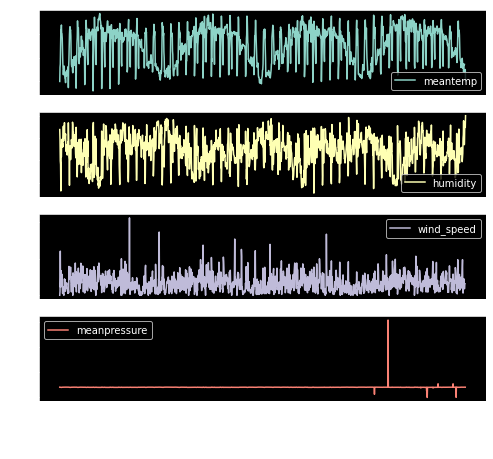

In [12]:
Plotter.plot_line(df)

In [14]:
# <halerium id="c07200fe-bb36-42a4-a657-48d113c6e848">
export_path = './merged_data.csv'
# </halerium id="c07200fe-bb36-42a4-a657-48d113c6e848">

df.to_csv(export_path)